In [1]:
import numpy as np

import matplotlib.pyplot as plt
from imageio import imread

import pandas as pd
import seaborn as sns
import glob

from scipy import misc
from sklearn.cluster import KMeans

sns.set()

In [2]:
metal1 = imread('Metal.1.bmp')
metal2 = imread('Metal.2.bmp')
metal3 = imread('Metal.3.bmp')
metal4 = imread('Metal.4.bmp')

sand1 = imread('Sand.1.bmp')
sand2 = imread('Sand.2.bmp')
sand3 = imread('Sand.3.bmp')
sand4 = imread('Sand.4.bmp')

terrain1 = imread('Terrain.1.bmp')
terrain2 = imread('Terrain.2.bmp')
terrain3 = imread('Terrain.3.bmp')
terrain4 = imread('Terrain.4.bmp')

In [3]:
def LBP(I):
    B = np.zeros(np.shape(I))
    code = np.array([
        [1,2,4],
        [8,0,16],
        [32,64,128]
    ])
    
    for i in np.arange(1, I.shape[0]-2):
        for j in np.arange(1, I.shape[1]-2):
            w = I[i-1:i+2, j-1:j+2]
            w = w>=I[i,j]
            w = w*code
            B[i,j] = np.sum(w)
            
    h, edges = np.histogram(B[1:-1, 1:-1], density=True, bins=256)
    return h, edges

Text(0.5, 1.0, 'Metal')

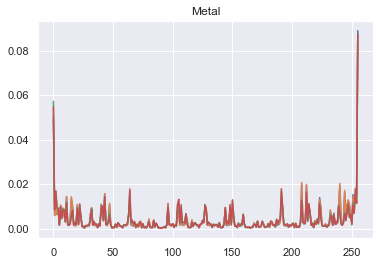

In [4]:
metal = [metal1, metal2, metal3, metal4]

hh = []
plt.figure()
for el in metal:
    I = el
    I = I[:,:,1]
    h,edges = LBP(I)
    plt.plot(h)
    hh.append(h)
plt.title('Metal')


<AxesSubplot:>

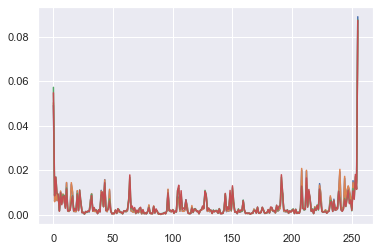

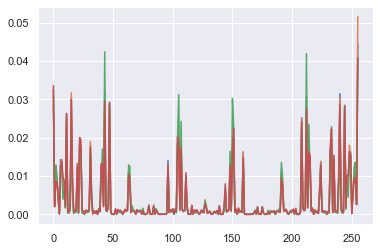

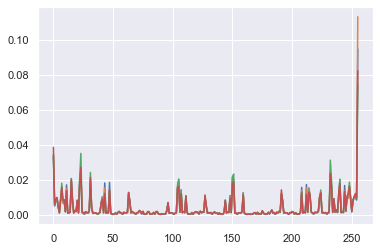

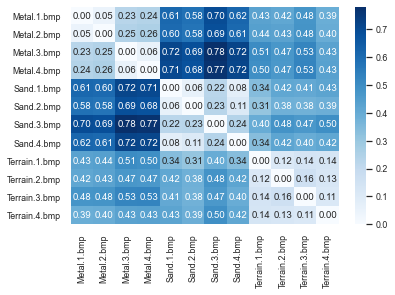

In [5]:
all_imgs = [[metal1, metal2, metal3, metal4],
            [sand1, sand2, sand3, sand4],
            [terrain1, terrain2, terrain3, terrain4]]
hh = []

names=['Metal.1.bmp', 'Metal.2.bmp', 'Metal.3.bmp', 'Metal.4.bmp',
'Sand.1.bmp', 'Sand.2.bmp', 'Sand.3.bmp', 'Sand.4.bmp',
'Terrain.1.bmp','Terrain.2.bmp', 'Terrain.3.bmp', 'Terrain.4.bmp']

for c in all_imgs:
    plt.figure()
    for el in c:
        I = el
        I = I[:,:,1]
        h,edges = LBP(I)
        plt.plot(h)
        hh.append(h)
        
n = len(hh)
dists = np.zeros((n,n))
classes =  ['Metal', 'Sand', 'Terrain']
for i in np.arange(n):
    for j in np.arange(n):
        dists[i,j] = np.sum(np.abs(hh[i]-hh[j]))
        
df_cm = pd.DataFrame(dists, index = names , columns = names)
fig = plt.figure()
sns.set(font_scale =.8)
sns.heatmap(df_cm, annot=True, cmap = plt.cm.Blues, fmt='.2f')

In [6]:
n = 3
km = KMeans(init='k-means++', n_clusters=3, n_init=10)
km.fit(hh)
print(km.labels_)

[0 0 0 0 1 1 1 1 2 2 2 2]


In [7]:
len(hh)

12